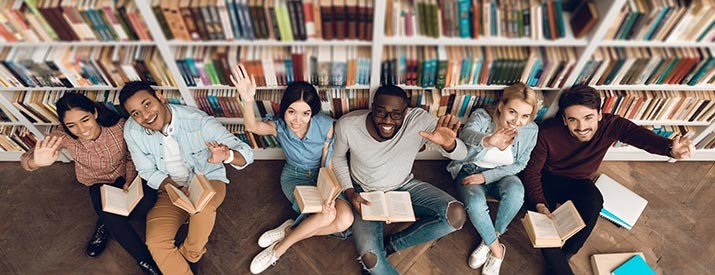

# Libraries

In [234]:
# for visualization -------------------

import matplotlib.pyplot as plt
import seaborn as srn

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

# Data gathering and primary visualizations

In [235]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-alcohol-consumption/student-por.csv
/kaggle/input/student-alcohol-consumption/student-merge.R
/kaggle/input/student-alcohol-consumption/student-mat.csv


In [236]:
d1=pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
d2=pd.read_csv('/kaggle/input/student-alcohol-consumption/student-por.csv')

In [237]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [238]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [239]:
d1.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [240]:
d2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Pre-processing

## Leakages

As we've seen in datafram.info( )    that there are no null columns so we do not have to find and replace or fill any leakages of the dataframes.

## Encoding

As we are going to analyze the data deeply we are not using LabelEncoder to numerate the object data type columns.
As it'll be hard to retrieve the name of the columns encoded by the encoder.

We are going to change all the categorical columns in the some steps ---------


                                 1. taking all the type of attributes in an array
                                 2. Changing / replacing those with numerical data

#### SCHOOL

In [241]:
school=d1['school'].value_counts().index
school
k=0
for i in school:
    d1['school'].replace(i,k,inplace=True)
    d2['school'].replace(i,k,inplace=True)
    k+=1

As we have several object type data we are going to do the same process again and again until we make all the data into non-categorical

### You can simply overlook next cells before EDA .

#### SEX

In [242]:
sex=d1['sex'].value_counts().index
school
k=0
for i in sex:
    d1['sex'].replace(i,k,inplace=True)
    d2['sex'].replace(i,k,inplace=True)
    k+=1

#### Adress

In [243]:
address=d1['address'].value_counts().index
school
k=0
for i in address:
    d1['address'].replace(i,k,inplace=True)
    d2['address'].replace(i,k,inplace=True)
    k+=1

#### Family Size

In [244]:
famsize=d1['famsize'].value_counts().index
school
k=0
for i in famsize:
    d1['famsize'].replace(i,k,inplace=True)
    d2['famsize'].replace(i,k,inplace=True)
    k+=1

#### Parent's cohabitation status

In [245]:
Pstatus=d1['Pstatus'].value_counts().index
school
k=0
for i in Pstatus:
    d1['Pstatus'].replace(i,k,inplace=True)
    d2['Pstatus'].replace(i,k,inplace=True)
    k+=1

#### Mother's Job

In [246]:
mjob=d1['Mjob'].value_counts().index
school
k=0
for i in mjob:
    d1['Mjob'].replace(i,k,inplace=True)
    d2['Mjob'].replace(i,k,inplace=True)
    k+=1

#### Fathre's Job

In [247]:
fjob=d1['Fjob'].value_counts().index
school
k=0
for i in fjob:
    d1['Fjob'].replace(i,k,inplace=True)
    d2['Fjob'].replace(i,k,inplace=True)
    k+=1

#### Reason of choosing schools

In [248]:
reason=d1['reason'].value_counts().index
school
k=0
for i in reason:
    d1['reason'].replace(i,k,inplace=True)
    d2['reason'].replace(i,k,inplace=True)
    k+=1

#### Guardian

In [249]:
guardian=d1['guardian'].value_counts().index
school
k=0
for i in guardian:
    d1['guardian'].replace(i,k,inplace=True)
    d2['guardian'].replace(i,k,inplace=True)
    k+=1

#### Extra Educational Support

In [250]:
schoolsup=d1['schoolsup'].value_counts().index
school
k=0
for i in schoolsup:
    d1['schoolsup'].replace(i,k,inplace=True)
    d2['schoolsup'].replace(i,k,inplace=True)
    k+=1

#### Family Educational Support

In [251]:
famsup=d1['famsup'].value_counts().index
school
k=0
for i in famsup:
    d1['famsup'].replace(i,k,inplace=True)
    d2['famsup'].replace(i,k,inplace=True)
    k+=1

#### Extra Paid Classes

In [252]:
paid=d1['paid'].value_counts().index
school
k=0
for i in paid:
    d1['paid'].replace(i,k,inplace=True)
    d2['paid'].replace(i,k,inplace=True)
    k+=1

#### Extra Curricular Activites

In [253]:
activities=d1['activities'].value_counts().index
school
k=0
for i in activities:
    d1['activities'].replace(i,k,inplace=True)
    d2['activities'].replace(i,k,inplace=True)
    k+=1

#### Attended Nursery School

In [254]:
nursery=d1['nursery'].value_counts().index
k=0
for i in nursery:
    d1['nursery'].replace(i,k,inplace=True)
    d2['nursery'].replace(i,k,inplace=True)
    k+=1

#### Higher Education

In [255]:
higher=d1['higher'].value_counts().index
k=0
for i in higher:
    d1['higher'].replace(i,k,inplace=True)
    d2['higher'].replace(i,k,inplace=True)
    k+=1

#### Internet Access at Home

In [256]:
internet=d1['internet'].value_counts().index
k=0
for i in internet:
    d1['internet'].replace(i,k,inplace=True)
    d2['internet'].replace(i,k,inplace=True)
    k+=1

#### Romantic Relationship Status

In [257]:
romantic=d1['romantic'].value_counts().index
k=0
for i in romantic:
    d1['romantic'].replace(i,k,inplace=True)
    d2['romantic'].replace(i,k,inplace=True)
    k+=1

Now we have encoded all the object type data and now can start the EDA

# EDA / Correlation between Features

### gardes per school

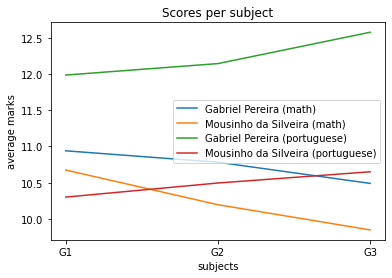

In [258]:
s1=d1[d1['school']==0]
s2=d1[d1['school']==1]
s3=d2[d2['school']==0]
s4=d2[d2['school']==1]
x1=[]
x2=[]
x3=[]
x4=[]
x=['G1','G2','G3']
for xs in x:
    x1.append(np.mean(s1[xs]))
    x2.append(np.mean(s2[xs]))
    x3.append(np.mean(s3[xs]))
    x4.append(np.mean(s4[xs]))
plt.plot(x,x1,label='Gabriel Pereira (math)')
plt.legend()
plt.plot(x,x2,label='Mousinho da Silveira (math)')
plt.legend()
plt.plot(x,x3,label='Gabriel Pereira (portuguese)')
plt.legend()
plt.plot(x,x4,label='Mousinho da Silveira (portuguese)')
plt.legend()
plt.title('Scores per subject')
plt.xlabel('subjects')
plt.ylabel('average marks')
plt.show()

It shows that Gabriel Pereira has better performance in both subjects than Mousinho de Silveira. And the marks over language is much better than marks in math.

### grades per gender

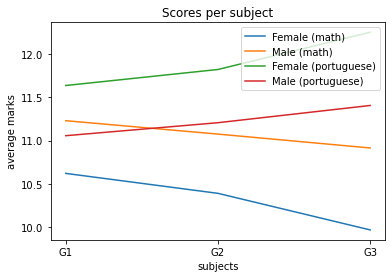

In [259]:
s1=d1[d1['sex']==0]
s2=d1[d1['sex']==1]
s3=d2[d2['sex']==0]
s4=d2[d2['sex']==1]
x1=[]
x2=[]
x3=[]
x4=[]
x=['G1','G2','G3']
for xs in x:
    x1.append(np.mean(s1[xs]))
    x2.append(np.mean(s2[xs]))
    x3.append(np.mean(s3[xs]))
    x4.append(np.mean(s4[xs]))
plt.plot(x,x1,label='Female (math)')
plt.legend()
plt.plot(x,x2,label='Male (math)')
plt.legend()
plt.plot(x,x3,label='Female (portuguese)')
plt.legend()
plt.plot(x,x4,label='Male (portuguese)')
plt.legend()
plt.title('Scores per subject')
plt.xlabel('subjects')
plt.ylabel('average marks')
plt.show()

Clarly visible that girls are more attracted towards the litereature where as the boys are quite average in both subjects.


     Conclusion: 
                
                score in math : boys are superior
                
                score in portuguese : girls are superior

## grades over age

#### Math

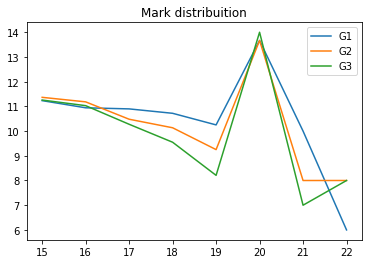

In [260]:
ag=np.arange(15,23,1)
plt.title('Mark distribuition')
for xs in x:
    arr=[]
    for i in ag:
        df=d1[d1['age']==i]
        arr.append(np.mean(df[xs]))
    plt.plot(ag,arr,label=xs)
    plt.legend()
plt.show()
        
    

#### Portuguese

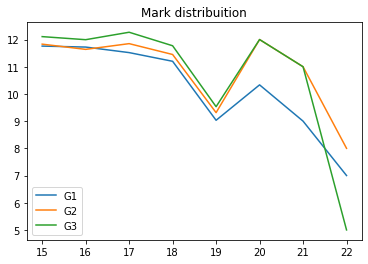

In [261]:
ag=np.arange(15,23,1)
plt.title('Mark distribuition')
for xs in x:
    arr=[]
    for i in ag:
        df=d2[d2['age']==i]
        arr.append(np.mean(df[xs]))
    plt.plot(ag,arr,label=xs)
    plt.legend()
plt.show()

Clearly visible the marks have visible variations as per age. 


    Math:
           21 < 22 < 19 < 18 < 17 < 16 < 15 < 20   (years)
    Portuguese:
           22 < 19 < 21 < 20 < 18 < 16 < 15 < 17   (years)

## Grades over Residence

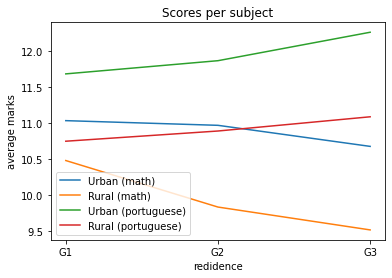

In [262]:
s1=d1[d1['address']==0]
s2=d1[d1['address']==1]
s3=d2[d2['address']==0]
s4=d2[d2['address']==1]
x1=[]
x2=[]
x3=[]
x4=[]
x=['G1','G2','G3']
for xs in x:
    x1.append(np.mean(s1[xs]))
    x2.append(np.mean(s2[xs]))
    x3.append(np.mean(s3[xs]))
    x4.append(np.mean(s4[xs]))
plt.plot(x,x1,label='Urban (math)')
plt.legend()
plt.plot(x,x2,label='Rural (math)')
plt.legend()
plt.plot(x,x3,label='Urban (portuguese)')
plt.legend()
plt.plot(x,x4,label='Rural (portuguese)')
plt.legend()
plt.title('Scores per subject')
plt.xlabel('redidence')
plt.ylabel('average marks')
plt.show()

    Conclusion:
                      Math : Urban > Rural
                      Portuguese : Urban > Rural
                      
It is clearly visible that the urban resident get more benefits on their studies and thus score well.

## Grades over Family-size

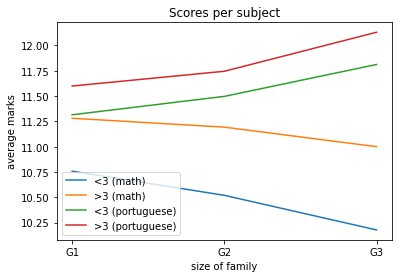

In [263]:
s1=d1[d1['famsize']==0]
s2=d1[d1['famsize']==1]
s3=d2[d2['famsize']==0]
s4=d2[d2['famsize']==1]
x1=[]
x2=[]
x3=[]
x4=[]
x=['G1','G2','G3']
for xs in x:
    x1.append(np.mean(s1[xs]))
    x2.append(np.mean(s2[xs]))
    x3.append(np.mean(s3[xs]))
    x4.append(np.mean(s4[xs]))
plt.plot(x,x1,label='<3 (math)')
plt.legend()
plt.plot(x,x2,label='>3 (math)')
plt.legend()
plt.plot(x,x3,label='<3 (portuguese)')
plt.legend()
plt.plot(x,x4,label='>3 (portuguese)')
plt.legend()
plt.title('Scores per subject')
plt.xlabel('size of family')
plt.ylabel('average marks')
plt.show()

    Conclusion: 
                G1 : Greater than 3 > Less than 3
                G2 : Greater than 3 > Less than 3
                G3 : Greater than 3 > Less than 3

    Note :    Family size less than 3 indicated death of parents or divorce in marriage of the parents and that affects child study environment too much 

## Parental Status of Cohibition

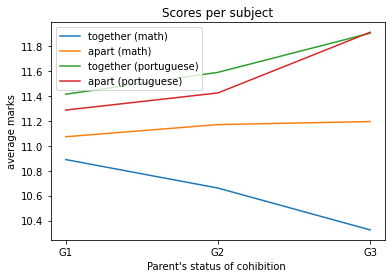

In [264]:
s1=d1[d1['Pstatus']==0]
s2=d1[d1['Pstatus']==1]
s3=d2[d2['Pstatus']==0]
s4=d2[d2['Pstatus']==1]
x1=[]
x2=[]
x3=[]
x4=[]
x=['G1','G2','G3']
for xs in x:
    x1.append(np.mean(s1[xs]))
    x2.append(np.mean(s2[xs]))
    x3.append(np.mean(s3[xs]))
    x4.append(np.mean(s4[xs]))
plt.plot(x,x1,label='together (math)')
plt.legend()
plt.plot(x,x2,label='apart (math)')
plt.legend()
plt.plot(x,x3,label='together (portuguese)')
plt.legend()
plt.plot(x,x4,label='apart (portuguese)')
plt.legend()
plt.title('Scores per subject')
plt.xlabel("Parent's status of cohibition ")
plt.ylabel('average marks')
plt.show()

we can see here the children whose parents are divorced are getting good marks in exams .

    This can led us to a conclusion ----

          Divorcee parents children are more focused to study as per seriousness of their paent's duty or over-matured mindset to build a good career.

## Parents Education

As we have father's and mother's education in different column we are going to add those in a single column and education of both affect on child as same.

In [265]:
ped1=d1['Fedu']+d1['Medu']
ped2=d2['Fedu']+d2['Medu']
pd1=pd.DataFrame({'pedu':ped1})
pd2=pd.DataFrame({'pedu':ped2})
d1.drop(labels=['Fedu','Medu'],axis=1,inplace=True)
d2.drop(labels=['Fedu','Medu'],axis=1,inplace=True)


In [266]:
d1=pd.concat([d1,pd1],axis=1)
d2=pd.concat([d2,pd2],axis=1)

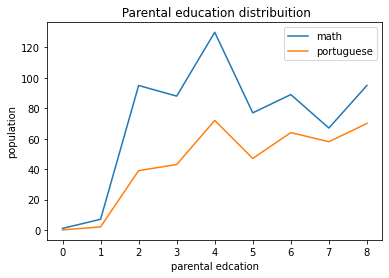

In [267]:
for xs in x:
    arr1=[]
    arr2=[]
    mat=[]
    por=[]
    for i in range(9):
        m1=d1[d1['pedu']==i]
        m2=d2[d2['pedu']==i]
        arr2.append(len(m1))
        arr1.append(len(m2))
        mat.append((np.mean(m1['G1'])+np.mean(m1['G2'])+np.mean(m1['G3']))/3)
        por.append((np.mean(m2['G1'])+np.mean(m2['G2'])+np.mean(m2['G3']))/3)
plt.plot(arr1,label='math')
plt.legend()
plt.plot(arr2,label='portuguese')
plt.legend()
plt.title(' Parental education distribuition')
plt.xlabel('parental edcation')
plt.ylabel("population")
plt.show()

This columns shows that the parents having mediocore studies are higher in number than parents having further studies.

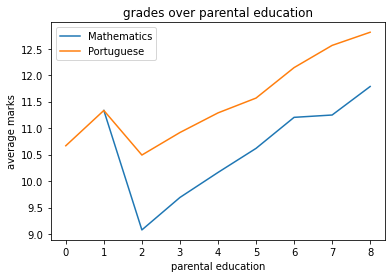

In [268]:
plt.plot(mat,label='Mathematics')
plt.legend()
plt.plot(por,label='Portuguese')
plt.legend()
plt.title('grades over parental education')
plt.xlabel('parental education')
plt.ylabel('average marks')
plt.show()

     Conclusion :
             Leaving some exceptions ( very poor family students' better performance). it is crystal clear that higher education of parents led children gain better grades than others.
             Educated parents led their child a study-oriented environment and that appropriately created effect on their grades
             
             
             
             Better education of Parents  ∝  Higher grades

## Parent's Profession

### Father's Profession

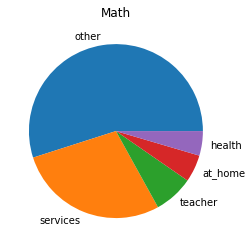

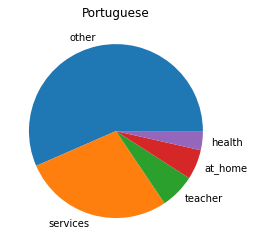

In [269]:

x1=d1['Fjob'].value_counts().values
x2=d2['Fjob'].value_counts().values
plt.title('Math')
plt.pie(x1,labels=fjob)
plt.show()
plt.title('Portuguese')
plt.pie(x2,labels=fjob)
plt.show()

### Mother's Profession

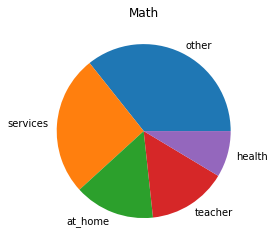

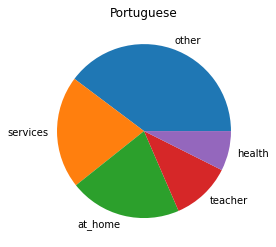

In [270]:
x1=d1['Mjob'].value_counts().values
x2=d2['Mjob'].value_counts().values
plt.title('Math')
plt.pie(x1,labels=mjob)
plt.show()
plt.title('Portuguese')
plt.pie(x2,labels=mjob)
plt.show()

These pie-charts are showing that majority of fathers' of the children are working in services or other jobs and mothers' are equally dispersed over many occupation

In [271]:
fjob
mjob

Index(['other', 'services', 'at_home', 'teacher', 'health'], dtype='object')

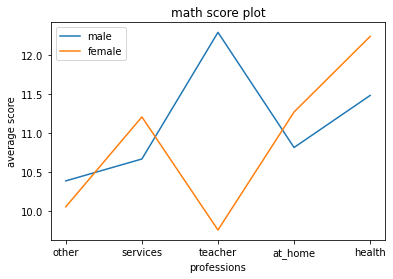

In [272]:
mal1=[]
fem1=[]
for col in range(len(fjob)):
    arr=d1[d1['Fjob']==col]
    mal1.append((np.mean(arr['G1'])+np.mean(arr['G2'])+np.mean(arr['G3']))/3)
    arr=d1[d1['Mjob']==col]
    fem1.append((np.mean(arr['G1'])+np.mean(arr['G2'])+np.mean(arr['G3']))/3)
plt.title('math score plot')
plt.xlabel('professions')
plt.ylabel('average score')
plt.plot(fjob,mal1,label='male')
plt.legend()
plt.plot(fjob,fem1,label='female')
plt.legend()
plt.show()

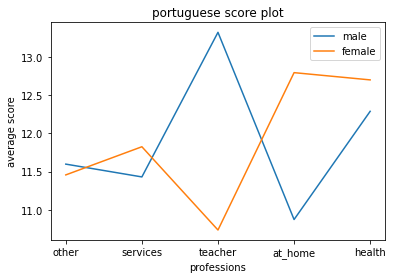

In [273]:
mal2=[]
fem2=[]
for col in range(len(fjob)):
    arr=d2[d2['Fjob']==col]
    mal2.append((np.mean(arr['G1'])+np.mean(arr['G2'])+np.mean(arr['G3']))/3)
    arr=d2[d2['Mjob']==col]
    fem2.append((np.mean(arr['G1'])+np.mean(arr['G2'])+np.mean(arr['G3']))/3)
plt.title('portuguese score plot')
plt.xlabel('professions')
plt.ylabel('average score')
plt.plot(fjob,mal2,label='male')
plt.legend()
plt.plot(fjob,fem2,label='female')
plt.legend()
plt.show()

In [274]:
male=[]
female=[]
for i in range(len(mal1)):
    male.append((mal1[i]+mal2[i])/2)
    female.append((fem1[i]+fem2[i])/2)

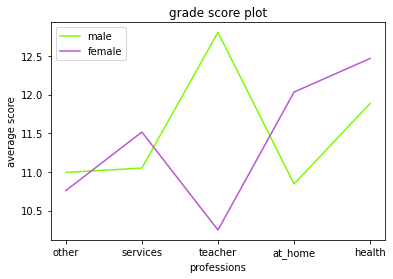

In [275]:
plt.title('grade score plot')
plt.xlabel('professions')
plt.ylabel('average score')
plt.plot(fjob,male,label='male',color='lawngreen')
plt.legend()
plt.plot(fjob,female,label='female',color='mediumorchid')
plt.legend()
plt.show()

    Conclusion :
    
            Male :  Teacher > Health > Services > At_home > Other
            
            Female :  Health > At_home > Services > Other > Teacher

## Reason for choosing the school

#### from math data

In [276]:
gp=d1[d1['school']==0]
mp=d1[d1['school']==1]

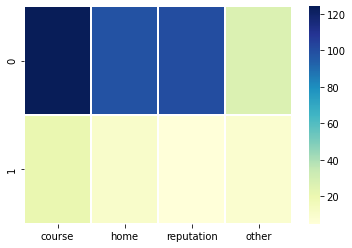

In [277]:
school=['Gabriel Pereira','Mousinho da Silveira']
dataf=pd.DataFrame({'course':[len(gp[gp['reason']==0]),len(mp[mp['reason']==0])],
                    'home':[len(gp[gp['reason']==1]),len(mp[mp['reason']==1])],
                   'reputation':[len(gp[gp['reason']==2]),len(mp[mp['reason']==2])],
                    'other':[len(gp[gp['reason']==3]),len(mp[mp['reason']==3])]})
srn.heatmap(dataf,cmap="YlGnBu",linewidth=0.5)
plt.show()

#### from portuguese data

In [278]:
gp=d2[d2['school']==0]
mp=d2[d2['school']==1]

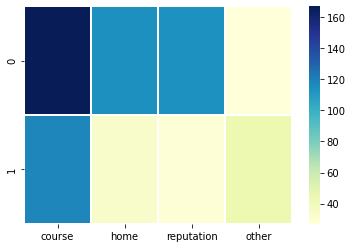

In [279]:
dataf=pd.DataFrame({'course':[len(gp[gp['reason']==0]),len(mp[mp['reason']==0])],
                    'home':[len(gp[gp['reason']==1]),len(mp[mp['reason']==1])],
                   'reputation':[len(gp[gp['reason']==2]),len(mp[mp['reason']==2])],
                    'other':[len(gp[gp['reason']==3]),len(mp[mp['reason']==3])]})
srn.heatmap(dataf,cmap="YlGnBu",linewidth=0.5)
plt.show()

These 2 heatmaps show that the school ***Gabriel Pereira*** outperforms the school ***Mousinho da Silveira*** in every single reason to get admission in there. Previously we have found that students of ***Gabriel Pereira*** are having greater grades than the other and both reason are interconnected to each other.

  So , from here can come to a 
  
    CONCLUSION : Gabriel Pereira is a better school than Mousinho da Silveira.

## Grades over guardian variations

([<matplotlib.patches.Wedge at 0x7fcf8f8e7b50>,
 [Text(-0.6215438540771381, 0.907569962845255, 'mother'),
  Text(0.406934314446385, -1.128895240368233, 'father'),
  Text(1.1613444637979355, -0.30212420691809105, 'other')])

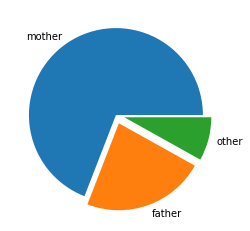

In [280]:
val=(0,0.1,0.1)
mat=d1['guardian'].value_counts().values
por=d2['guardian'].value_counts().values
plt.pie(mat,labels=guardian,explode=val)

([<matplotlib.patches.Wedge at 0x7fcf8d5ef990>,
 [Text(-0.6495755512487759, 0.887722706265785, 'mother'),
  Text(0.5037761158483168, -1.0891325103497662, 'father'),
  Text(1.1764439271923137, -0.23660026663621128, 'other')])

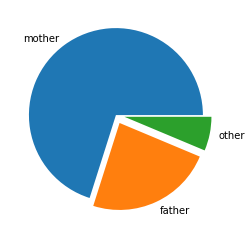

In [281]:

plt.pie(por,labels=guardian,explode=val)

Most of the guardian is female and still there are some children who do not have any parents and still going to schools.

#### Math grades as per guardian

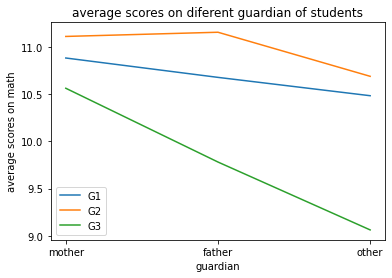

In [282]:
plt.title('average scores on diferent guardian of students')
plt.xlabel('guardian')
plt.ylabel('average scores on math')
for i in range(3):
    arr=[]
    df=d1[d1['guardian']==i]
    k=0
    for j in range(len(x)):
        arr.append(np.mean(df[x[j]]))
    plt.plot(guardian,arr,label=x[i])
    plt.legend()

    Conclusion :
    
           Mothers are good guardians than father and father ib better than others in parenting.
           
           Mother > Father > Others

## Study and traveltime

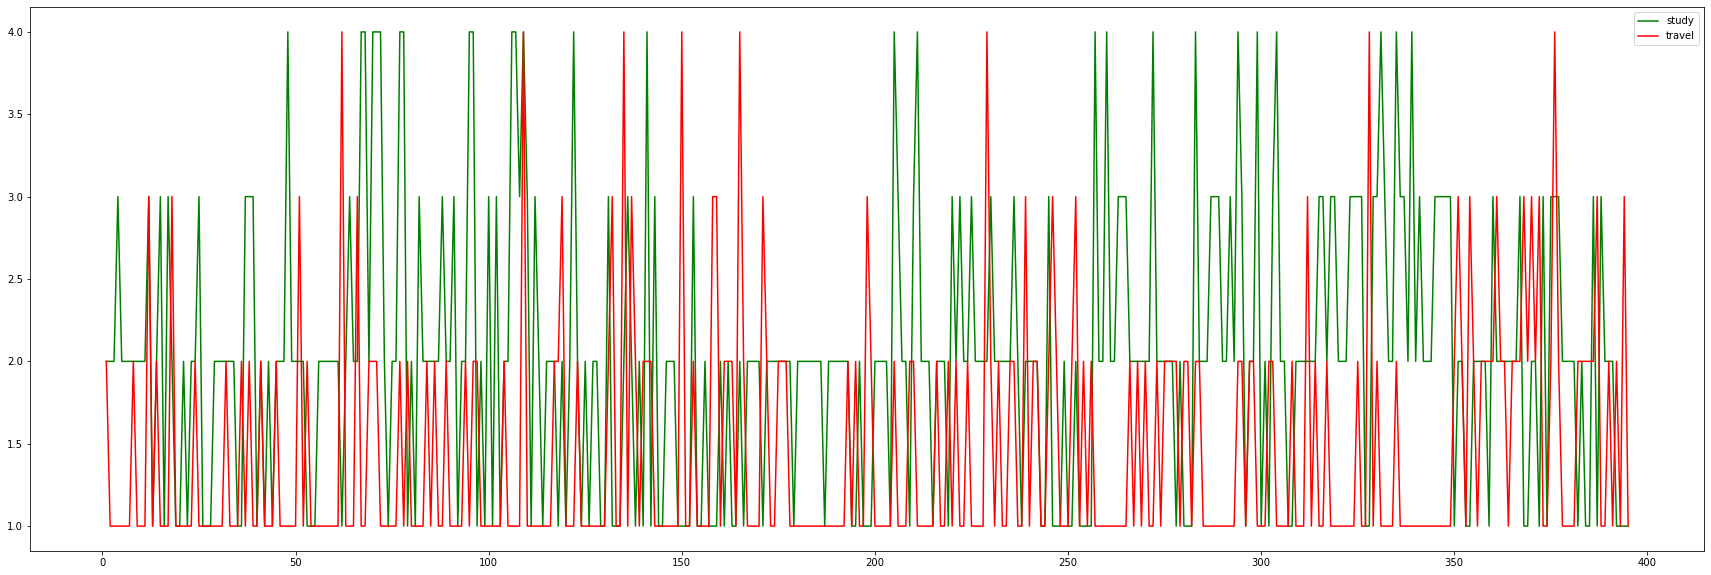

In [283]:
dat=pd.DataFrame({'study':d1['studytime'],'travel':d1['traveltime'],'totgrad':d1['G1']+d1['G2']+d1['G3']})
dat_temp=dat.drop('totgrad',1)
sc=np.arange(1,len(dat)+1,1)
plt.figure(figsize=(30,10))
# plt.bar(sc,dat['study'],label='study')
# plt.legend()
# plt.bar(sc,dat['travel'],label='travel')
# plt.legend()
plt.plot(sc,dat['study'],label='study',color='g')
plt.legend()
plt.plot(sc,dat['travel'],label='travel',color='r')
plt.legend()
plt.show()

The graph looks like that the two attributes are inversely proportional

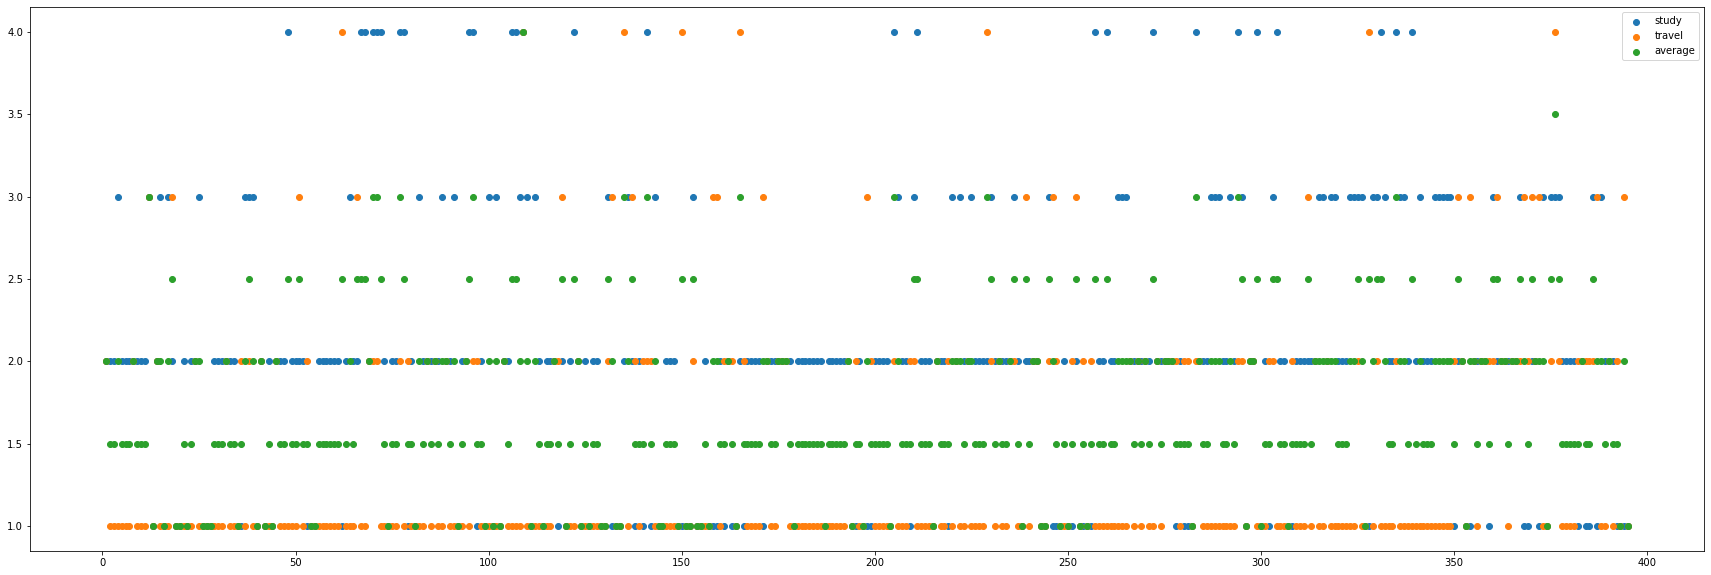

In [284]:
plt.figure(figsize=(30,10))
plt.scatter(sc,dat['study'],label='study')
plt.scatter(sc,dat['travel'],label='travel')
plt.scatter(sc,(dat['study']+dat['travel'])/2,label='average')
plt.legend()

This scatterplot definitely proves that the study time and the travel time of the children are inversely proportional and this is what happens in real world.

    Conclusion :
                  studytime ∝ 1 / traveltime

## Past Failures

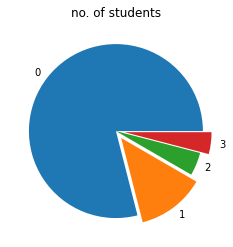

In [285]:
m=d1['failures'].value_counts().index
mm=d1['failures'].value_counts().values
plt.pie(mm,labels=m,explode=(0,0.1,0,0.1))
plt.title('no. of students')
plt.show()

This is normal situation where no of students decreasing with increasing number of failures

In [286]:
x1=pd.DataFrame({'tot_g':d1['G1']+d1['G2']+d1['G3']})
x2=pd.DataFrame({'tot_g':d2['G1']+d2['G2']+d2['G3']})
d1=pd.concat([d1,x1],axis=1)
d2=pd.concat([d2,x2],axis=1)


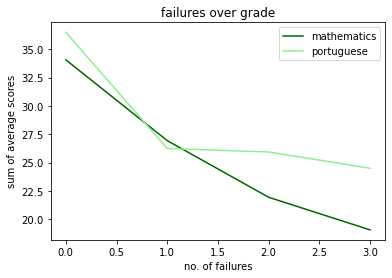

In [287]:
mat=[]
por=[]
for i in range(4):
    dx=d1[d1['failures']==i]
    mat.append(np.mean(dx['tot_g']))
    dx=d2[d2['failures']==i]
    por.append(np.mean(dx['tot_g']))
plt.plot(mat,label='mathematics',color='darkgreen')
plt.plot(por,label='portuguese',color='lightgreen')
plt.title('failures over grade')
plt.xlabel('no. of failures')
plt.ylabel('sum of average scores')
plt.legend()

    Conclusion:
    
                  Sincere students (who fails less in exams ) are getting higher marks.    ( as expected )

## Educational Support

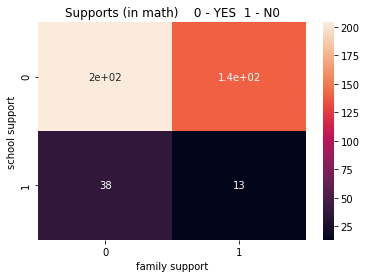

In [288]:
conf_matrix=pd.crosstab(d1['schoolsup'], d1['famsup'], rownames=['school support'], colnames=['family support'])
srn.heatmap(conf_matrix, annot=True)
plt.title('Supports (in math)    0 - YES  1 - N0')
plt.show()

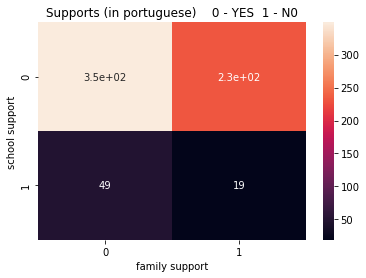

In [289]:
conf_matrix=pd.crosstab(d2['schoolsup'], d2['famsup'], rownames=['school support'], colnames=['family support'])
srn.heatmap(conf_matrix, annot=True)
plt.title('Supports (in portuguese)    0 - YES  1 - N0')
plt.show()

Students getting both type of support are high in number that can display the higher average scores ogf the students ( which is >10/15 ).

Still support of school are high .

# Extra Classes

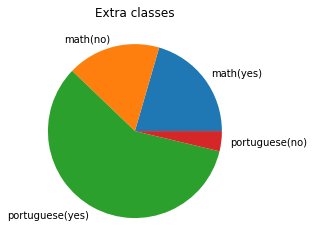

In [290]:
arr=[]
arr.append(len(d1[d1['paid']==0]))
arr.append(len(d1[d1['paid']==1]))
arr.append(len(d2[d2['paid']==0]))
arr.append(len(d2[d2['paid']==1]))
mx=['math(yes)','math(no)','portuguese(yes)','portuguese(no)']
plt.title('Extra classes')
plt.pie(arr,labels=mx)
plt.show()

In [291]:
arr=[]
m=d1[d1['paid']==0]
arr.append(np.mean(m['tot_g'])/3)
m=d1[d1['paid']==1]
arr.append(np.mean(m['tot_g'])/3)
m=d2[d2['paid']==0]
arr.append(np.mean(m['tot_g'])/3)
m=d2[d2['paid']==1]
arr.append(np.mean(m['tot_g'])/3)
mx=['math(yes)','math(no)','portuguese(yes)','portuguese(no)']

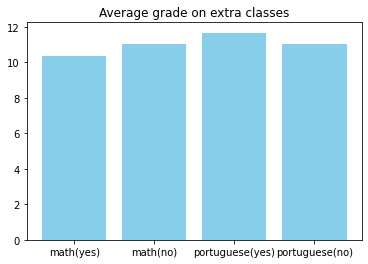

In [292]:
plt.title('Average grade on extra classes')
plt.bar(mx,arr,color='skyblue')
plt.show()

    Conclusion :
                 a) Portugues : having extra paid class helped the students to achieve more 
                 b) Maths : having extra paid classes did not found fruitful than those eho did not take paid classes

## Extra Curricular Activities

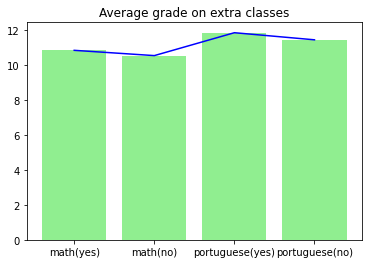

In [293]:
arr=[]
m=d1[d1['activities']==0]
arr.append(np.mean(m['tot_g'])/3)
m=d1[d1['activities']==1]
arr.append(np.mean(m['tot_g'])/3)
m=d2[d2['activities']==0]
arr.append(np.mean(m['tot_g'])/3)
m=d2[d2['activities']==1]
arr.append(np.mean(m['tot_g'])/3)
mx=['math(yes)','math(no)','portuguese(yes)','portuguese(no)']
plt.title('Average grade on extra classes')
plt.bar(mx,arr,color='lightgreen')
plt.plot(mx,arr,color='blue')
plt.show()

    Conclusion :     Having extra curricular activies made the children score more in exams.

## Other Studies

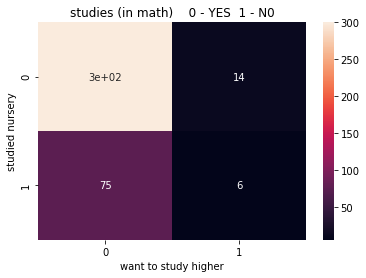

In [294]:
conf_matrix=pd.crosstab(d1['nursery'], d1['higher'], rownames=['studied nursery'], colnames=['want to study higher'])
srn.heatmap(conf_matrix, annot=True)
plt.title('studies (in math)    0 - YES  1 - N0')
plt.show()

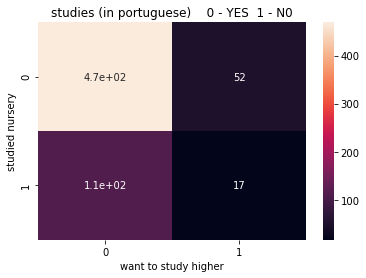

In [295]:
conf_matrix=pd.crosstab(d2['nursery'], d2['higher'], rownames=['studied nursery'], colnames=['want to study higher'])
srn.heatmap(conf_matrix, annot=True)
plt.title('studies (in portuguese)    0 - YES  1 - N0')
plt.show()

Most of the students have studied in nursery but are lacking interests in higher studies . ( math )

This is kind of a weird situation :=|

But the data taken from the portuguese data is conventional.

## Interest Access

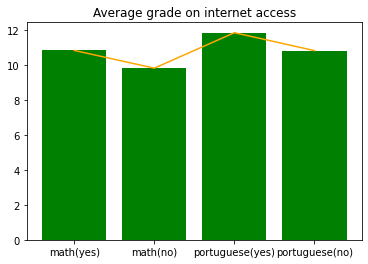

In [296]:
arr=[]
m=d1[d1['internet']==0]
arr.append(np.mean(m['tot_g'])/3)
m=d1[d1['internet']==1]
arr.append(np.mean(m['tot_g'])/3)
m=d2[d2['internet']==0]
arr.append(np.mean(m['tot_g'])/3)
m=d2[d2['internet']==1]
arr.append(np.mean(m['tot_g'])/3)
mx=['math(yes)','math(no)','portuguese(yes)','portuguese(no)']
plt.title('Average grade on internet access')
plt.bar(mx,arr,color='green')
plt.plot(mx,arr,color='orange')
plt.show()

    Conclusion :
             Internet access helps the children to their studies and thus scure high marks.

## Relationships 

from math data

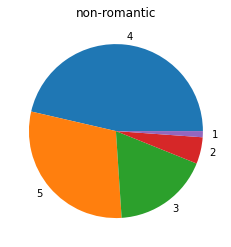

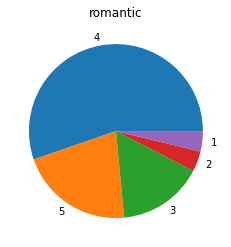

In [297]:
x1=d1[d1['romantic']==0]
x1=x1['famrel']
x2=d1[d1['romantic']==1]
x2=x2['famrel']
plt.title('non-romantic')
plt.pie(x1.value_counts().values,labels=x1.value_counts().index)
plt.show()
plt.title('romantic')
plt.pie(x2.value_counts().values,labels=x2.value_counts().index)
plt.show()

This pie charts showing that family relations are quite good with students .

 And the second point is that those who are in romantic relationship have more 4 grader and less 5 grader relation ship with family. This shows they surely had to spent time with their romantic partner XD

# Utilisation of free time

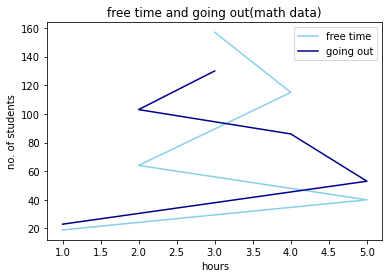

In [298]:
a=d1['freetime'].value_counts()
b=d1['goout'].value_counts()
plt.plot(a.index,a.values,label='free time',color='skyblue')
plt.plot(b.index,b.values,label='going out',color='darkblue')
plt.legend()
plt.title('free time and going out(math data)')
plt.xlabel('hours')
plt.ylabel('no. of students')
plt.show()

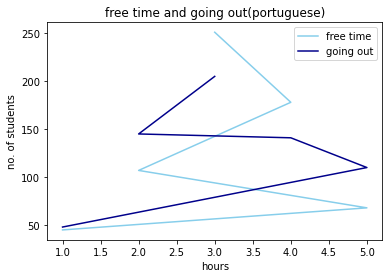

In [299]:
a=d2['freetime'].value_counts()
b=d2['goout'].value_counts()
plt.plot(a.index,a.values,label='free time',color='skyblue')
plt.plot(b.index,b.values,label='going out',color='darkblue')
plt.legend()
plt.title('free time and going out(portuguese)')
plt.xlabel('hours')
plt.ylabel('no. of students')
plt.show()

It shows on average a students gets 3 hours of free time and most of it get consumed to play.

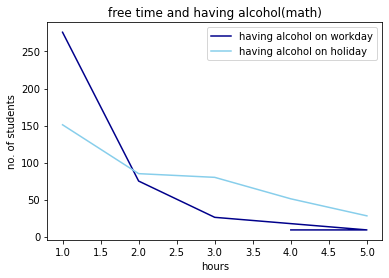

In [300]:
b=d1['Dalc'].value_counts()
plt.plot(b.index,b.values,label='having alcohol on workday',color='darkblue')
b=d1['Walc'].value_counts()
plt.plot(b.index,b.values,label='having alcohol on holiday',color='skyblue')
plt.title('free time and having alcohol(math)')
plt.xlabel('hours')
plt.ylabel('no. of students')
plt.legend()
plt.show()

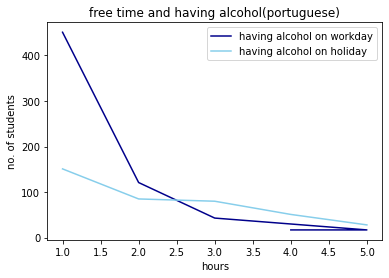

In [301]:

b=d2['Dalc'].value_counts()

plt.plot(b.index,b.values,label='having alcohol on workday',color='darkblue')
b=d1['Walc'].value_counts()
plt.plot(b.index,b.values,label='having alcohol on holiday',color='skyblue')
plt.title('free time and having alcohol(portuguese)')
plt.xlabel('hours')
plt.ylabel('no. of students')
plt.legend()
plt.show()

      Conclusion :
      
              1. Most of the people have alcohol on weekdays/workdays.
              2. People avoid alcohol on holidays.
              3. Holiday alcoholics are distributed on higher levels of alcohol consumption.

## Effect of alcohol on grades


As we are evaluating grades we are following a hypothesis that having alcohol on holidays doesn't affect the student very much.

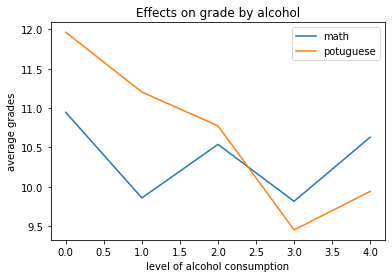

In [302]:
mat=[]
por=[]
for i in range(5):
    arr=d1[d1['Dalc']==i+1]
    mat.append(np.mean(arr['tot_g'])/3)
    arr=d2[d2['Dalc']==i+1]
    por.append(np.mean(arr['tot_g'])/3)
plt.plot(mat,label='math')
plt.plot(por,label='potuguese')
plt.title('Effects on grade by alcohol')
plt.xlabel('level of alcohol consumption')
plt.ylabel('average grades')
plt.legend()
plt.show()

     Conclusion :
     
     
             1. People having alcohol are having less scores in their exams .
             2. Math scores are not that much affected by the alcohol consumers.
             3. Portuguese or litereature scores are highly sropping as the level of alcohol consumption of the student increases.

## Health over grades

In [303]:
heal=['very bad','bad','average','good','very good']

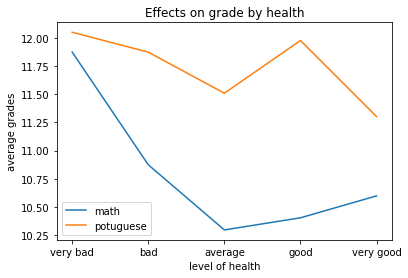

In [304]:
mat=[]
por=[]
for i in range(5):
    arr=d1[d1['health']==i+1]
    mat.append(np.mean(arr['tot_g'])/3)
    arr=d2[d2['health']==i+1]
    por.append(np.mean(arr['tot_g'])/3)
plt.plot(heal,mat,label='math')
plt.plot(heal,por,label='potuguese')
plt.title('Effects on grade by health')
plt.xlabel('level of health')
plt.ylabel('average grades')
plt.legend()
plt.show()

People  having poor health are scoring good  . For the first time the data looks insane :/

So the health doesn't affect the grades too much.

## Variation of grades over absence

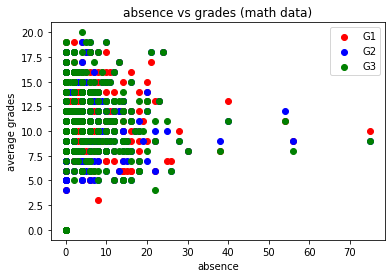

In [305]:
plt.scatter(d1['absences'],d1['G1'],label='G1',color='r')
plt.scatter(d1['absences'],d1['G2'],label='G2',color='b')
plt.scatter(d1['absences'],d1['G3'],label='G3',color='g')
plt.legend()
plt.title('absence vs grades (math data)')
plt.xlabel('absence')
plt.ylabel('average grades')
plt.show()

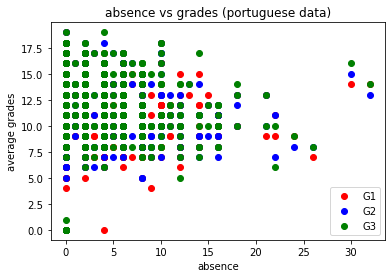

In [306]:
plt.scatter(d2['absences'],d2['G1'],label='G1',color='r')
plt.scatter(d2['absences'],d2['G2'],label='G2',color='b')
plt.scatter(d2['absences'],d2['G3'],label='G3',color='g')
plt.legend()
plt.title('absence vs grades (portuguese data)')
plt.xlabel('absence')
plt.ylabel('average grades')
plt.show()

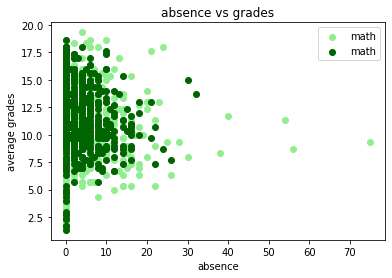

In [307]:
plt.scatter(d1['absences'],d1['tot_g']/3,label='math',color='lightgreen')
plt.scatter(d2['absences'],d2['tot_g']/3,label='math',color='darkgreen')
plt.legend()
plt.title('absence vs grades')
plt.xlabel('absence')
plt.ylabel('average grades')
plt.show()

     Conclusion :
                  1.Grades are showing that students are having less absence getting good marks that means they are focused over their study.
                  2. Getting more absence are creating less grades for students on maths but in portuguese that mean attending mth periods are important .
                  3.All over students are likely to get absent on an 20 day average and that's accurately normal.

#### After analysing the data it is well defined that students are very serious over their study as their marks are quite good for various conditions.Family environment are also helping the childor student to grow very much and heavily stay connected towards their study.  

This EDA **ENDS** here.

# UPVOTE if you like this kernel :)

### You can further join my dicord channel (atlantic data studio) . Invite Link -https://discord.gg/Unyt9Ehy

#### Please view my other works https://www.kaggle.com/sagnik1511/notebooks

#### Still if you find any misleading analysis or anything to add up , please comment as feedback :)

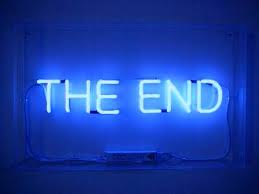